In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import tensorflow.keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from tensorflow.keras.models import Sequential



In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
indices = np.arange(x_train.shape[0])
np.random.shuffle(indices)

x_train = x_train[indices]
y_train = y_train[indices]

print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


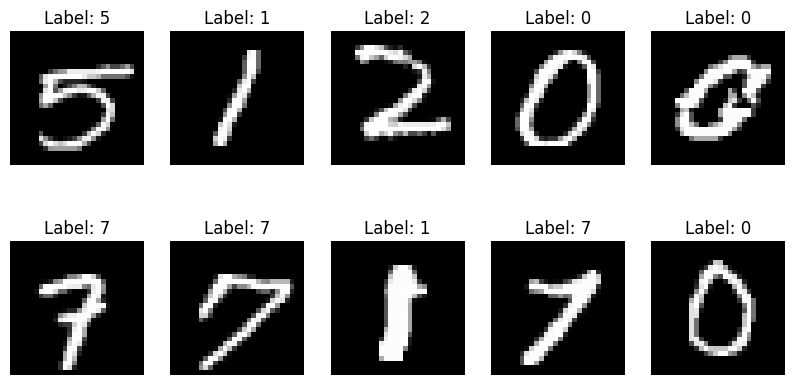

In [6]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')

plt.show()

In [7]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [9]:
model = Sequential()
model.add(Input(shape=(28, 28, 1)))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 3, 3, 64)          0

In [10]:
loss = 'categorical_crossentropy'
optimizer = 'adam'
batch_size = 64
epochs = 15

In [11]:
model.compile(loss=loss, optimizer=optimizer, metrics=["accuracy"])


In [12]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))


Epoch 1/15
938/938 [==============================] - 11s 6ms/step - loss: 0.1718 - accuracy: 0.9463 - val_loss: 0.0461 - val_accuracy: 0.9848
Epoch 2/15
938/938 [==============================] - 5s 5ms/step - loss: 0.0474 - accuracy: 0.9852 - val_loss: 0.0312 - val_accuracy: 0.9907
Epoch 3/15
938/938 [==============================] - 4s 5ms/step - loss: 0.0345 - accuracy: 0.9890 - val_loss: 0.0396 - val_accuracy: 0.9865
Epoch 4/15
938/938 [==============================] - 5s 5ms/step - loss: 0.0257 - accuracy: 0.9915 - val_loss: 0.0336 - val_accuracy: 0.9906
Epoch 5/15
938/938 [==============================] - 4s 5ms/step - loss: 0.0212 - accuracy: 0.9929 - val_loss: 0.0279 - val_accuracy: 0.9904
Epoch 6/15
938/938 [==============================] - 4s 5ms/step - loss: 0.0182 - accuracy: 0.9938 - val_loss: 0.0528 - val_accuracy: 0.9848
Epoch 7/15
938/938 [==============================] - 5s 6ms/step - loss: 0.0144 - accuracy: 0.9954 - val_loss: 0.0377 - val_accuracy: 0.9895
Epoch

In [18]:
def get_gradcam(model, img_array, class_index, last_conv_layer_name):
    grad_model = models.Model([model.inputs], [model.get_layer(last_conv_layer_name).output, model.output])

    with tf.GradientTape() as tape:
        conv_output, predictions = grad_model(np.array([img_array]))
        loss = predictions[:, class_index]

    output_grads = tape.gradient(loss, conv_output)[0]
    weights = tf.reduce_mean(output_grads, axis=(0, 1))
    cam = tf.reduce_sum(tf.multiply(weights, conv_output), axis=-1)
    cam = np.maximum(cam, 0)
    cam /= np.max(cam)

    return cam

1/1 [==============================] - 0s 25ms/step


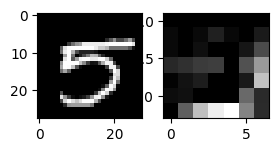

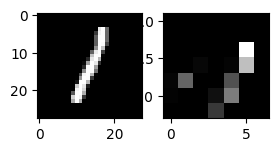

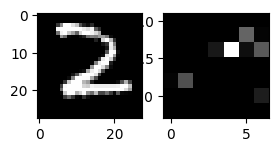

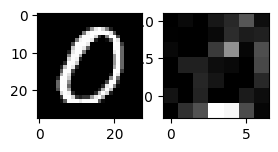

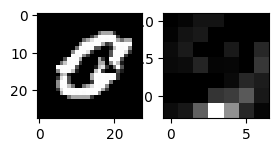

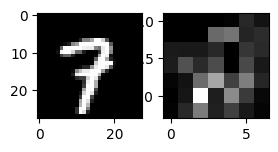

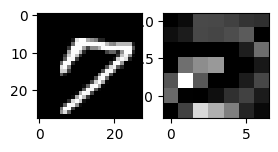

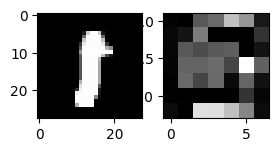

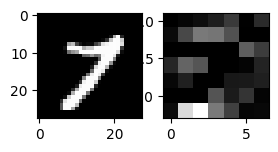

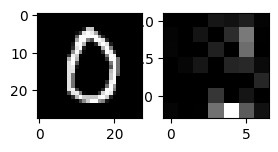

In [27]:
last_conv_layer = 'conv2d_2'
for i in range(10):
  sample_idx = i
  sample_image = x_train[sample_idx]
  sample_label = y_train[sample_idx]
  predicted_class = np.argmax(model.predict(np.array([sample_image]))[0])
  gradcam = get_gradcam(model, sample_image, predicted_class, last_conv_layer)

  plt.figure(figsize=(16, 8))
  plt.subplot(2, 10, 2 * i + 1)
  plt.imshow(sample_image, cmap='gray')
  plt.subplot(2, 10, 2 * i + 2)
  plt.imshow(gradcam[0], cmap='gray')

plt.show()
